In [ ]:
from sklearn.datasets import make_circles

In [ ]:
# Make 1000 samples
n_samples=1000

In [ ]:
#Create Labels and Features
X,y=make_circles(n_samples,noise=0.03,random_state=42)

Lets Visualize the data as it is hard to understand

In [ ]:
import pandas as pd 

In [ ]:
circles=pd.DataFrame({'X0':X[:,0],"X1":X[:,1],'label':y})
circles.head()

Visualize it with  a Plot 

In [ ]:
import matplotlib.pyplot as plt 
plt.scatter(circles["X0"],circles["X1"],c=y)
plt.show()

Second Way of Visualization

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [ ]:
X.shape,y.shape

In [ ]:
len(X),len(y)

Model Creation


In [ ]:
import tensorflow as tf

In [ ]:
tf.random.set_seed(42)
# Model 1 
model1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['accuracy'])
model1.fit(X,y,epochs=5,verbose=0)

In [ ]:
model1.evaluate(X,y)

Improve model by introducing a hidden a layer

In [ ]:
tf.random.set_seed(42)
# Model 2 
model2=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
])
model2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['accuracy'])
model2.fit(X,y,epochs=100,verbose=0)

In [ ]:
model2.evaluate(X,y)

Again Try to improve again by changing optimizer , increasing hidden units and layers

In [ ]:
tf.random.set_seed(42)
# Model3
model3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])
model3.fit(X,y,epochs=100,verbose=0)

In [ ]:
model3.evaluate(X,y)

In [ ]:
import numpy as np

In [ ]:
def plot_decision_boundary(model,X,y):

    # Define axis boundraies for of the plot and create a meshgrid
    x_min,x_max=X[:,0].min()-0.1,X[:,1].max()+0.1
    y_min,y_max=X[:,1].min()+0.1,X[:,1].max()+0.1

    xx,yy=np.meshgrid(np.linspace(x_min,x_max,100),np.linspace(y_min,y_max,100))

    # Create X value to make predictions on these
    x_in=np.c_[xx.ravel(),yy.ravel()]   # Stacks 2d array together

    # Make Predictions
    y_pred=model.predict(x_in)
    
    # check for multi-class 
    if len(y_pred[0])>1:
        print('You are doing multi-class classification')
        # Reshape Predictions to get ready for plotting 
        y_pred=np.argmax(y_pred,axis=1).reshape(xx.shape)
    else:
        print("Doing Binary Classification")
        y_pred=np.round(y_pred).reshape(xx.shape)

    # Plot Decision boundry
    plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
    plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Doing Binary Classification


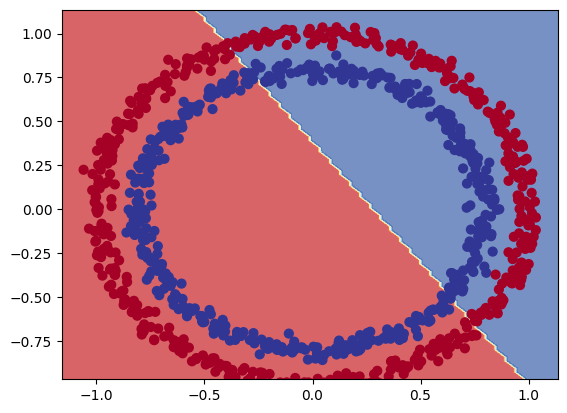

In [26]:
plot_decision_boundary(model3,X,y)

as our model is predicting a straight line 
lets try to fit it on straight data or linear data 


In [32]:
X_regression=tf.range(0,1000,5)
y_regression=tf.range(100,1100,5)
len(X_regression),len(y_regression)

(200, 200)

In [53]:
# Train Test Split

X_train_regression = tf.expand_dims(X_regression[:150], axis=-1)  # Shape: (150, 1)
X_test_regression  = tf.expand_dims(X_regression[150:], axis=-1)  # Shape: (50, 1)

y_train_regression=y_regression[:150]
y_test_regression=y_regression[150:]




In [64]:
tf.random.set_seed(42)
# Model3
model3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1)
])
model3.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['mae'])
model3.fit(X_train_regression,y_train_regression,epochs=100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 472.2823 - mae: 472.2823
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 424.8937 - mae: 424.8937 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 376.6978 - mae: 376.6978 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 327.2446 - mae: 327.2446 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 271.7849 - mae: 271.7849 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 209.3452 - mae: 209.3452 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 143.0896 - mae: 143.0896 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 71.2336 - mae: 71.2336 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 48.3082 - mae: 48.3082 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 61.4694 - mae: 61.4694 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 54.4631 - mae: 54.4631 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 43.5998 - mae: 43.5998 
Epoch 13/1

In [65]:
y_pred_reg=model3.predict(X_test_regression)

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/stepWARNING:tensorflow:5 out of the last 322 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001D51C4F1940> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


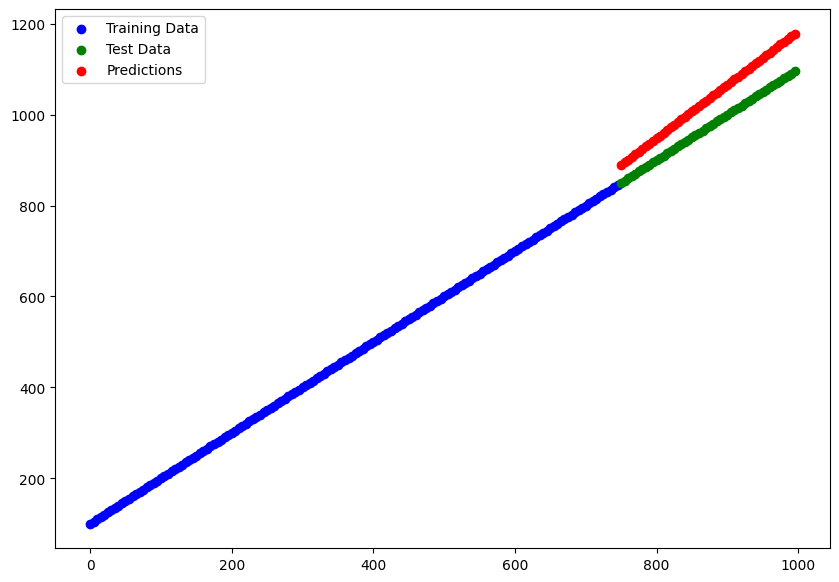

In [66]:
plt.figure(figsize=(10,7))
plt.scatter(X_train_regression,y_train_regression,c='b',label='Training Data')
plt.scatter(X_test_regression,y_test_regression,c='g',label='Test Data')
plt.scatter(X_test_regression,y_pred_reg,c='r',label='Predictions')
plt.legend();

In [90]:
tf.random.set_seed(42)
# Model3 Improvised
model3_improvised=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1)
])
model3_improvised.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics=['mae'])
model3_improvised.fit(X_train_regression,y_train_regression,epochs=230)

Epoch 1/230
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 440.9735 - mae: 440.9735
Epoch 2/230
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 185.2537 - mae: 185.2537 
Epoch 3/230
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 109.8016 - mae: 109.8016 
Epoch 4/230
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 77.9314 - mae: 77.9314   
Epoch 5/230
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 52.9777 - mae: 52.9777 
Epoch 6/230
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 44.4879 - mae: 44.4879 
Epoch 7/230
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 46.9702 - mae: 46.9702
Epoch 8/230
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 43.9553 - mae: 43.9553 
Epoch 9/230
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 42.6590 - mae: 42.6590
Epoch 10/230
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 42.6903 - mae: 42.6903 
Epoch 11/230
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 42.2498 - mae: 42.2498 
Epoch 12/230
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 40.4727 - mae: 40.4727 
Epoch 13/230
5/5 

In [91]:
y_pred_reg_improvised=model3_improvised.predict(X_test_regression)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


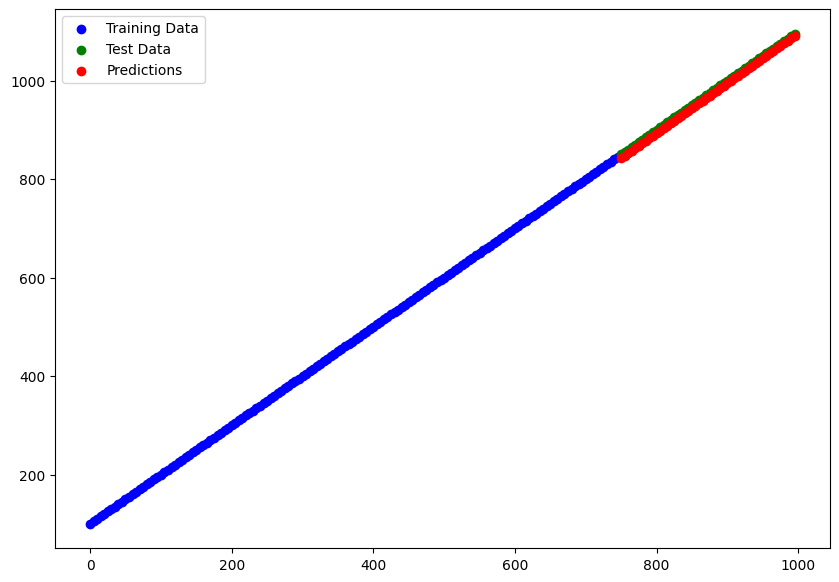

In [92]:
plt.figure(figsize=(10,7))
plt.scatter(X_train_regression,y_train_regression,c='b',label='Training Data')
plt.scatter(X_test_regression,y_test_regression,c='g',label='Test Data')
plt.scatter(X_test_regression,y_pred_reg_improvised,c='r',label='Predictions')
plt.legend();

In [98]:
model3_improvised.evaluate(X_test_regression,y_test_regression)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 5.6616 - mae: 5.6616 


[5.66163444519043, 5.66163444519043]